In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
t_max_factor = ['1.0', '1.1', '1.2', '1.3', '1.4', '1.5']
budget_factor = ['3', '2', '1']

ratio = np.zeros((len(budget_factor), len(t_max_factor)))
ratio_UB = 0

for i, b_f in enumerate(budget_factor):
    for j, t_f in enumerate(t_max_factor):
        
        dir = 'Results-'+t_f+'-'+b_f+'/'
        file_name = 'result-'+t_f+'-'+b_f+'.csv'
        
        df = pd.read_csv(dir+file_name, header=None)
        
        LB = df.iloc[:, 1].to_numpy()
        # rescheduling = df.iloc[:, 2]
        cost = df.iloc[:, 3].to_numpy()
        
        if i == 0 and j == 0:
            UB = df.iloc[:, 4].to_numpy()
            ratio_UB = np.mean(UB / LB)
            
        
        
        ratio[i][j] = np.mean(cost / LB)

ratio_decrease = (ratio_UB - ratio) / ratio_UB

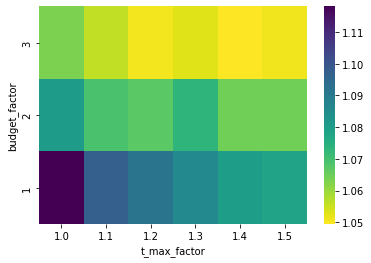

In [62]:
# Visualization

viridis = mpl.colormaps['viridis']
ratio_df = pd.DataFrame(data = ratio, index = budget_factor, columns = t_max_factor)


s1 = sns.heatmap(ratio_df, cmap = viridis.reversed())
s1.set(xlabel = 't_max_factor', ylabel = 'budget_factor')
fig1 = s1.get_figure()
fig1.savefig('H1.png', dpi = 300, facecolor = 'white')

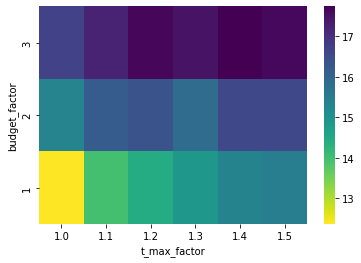

In [66]:

ratio_decrease_df = pd.DataFrame(data = ratio_decrease * 100, index = budget_factor, columns = t_max_factor)

s2 = sns.heatmap(ratio_decrease_df, cmap = viridis.reversed())
s2.set(xlabel = 't_max_factor', ylabel = 'budget_factor')
fig2 = s2.get_figure()
fig2.savefig('H2.png', dpi = 300, facecolor = 'white')

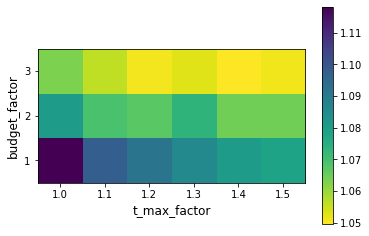

In [52]:
fig, ax = plt.subplots()
im = ax.imshow(ratio_df, cmap = viridis.reversed())

ax.set_xticks(np.arange(len(t_max_factor)), labels=t_max_factor)
ax.set_yticks(np.arange(len(budget_factor)), labels=budget_factor)
plt.xlabel('t_max_factor', fontsize = 12)
plt.ylabel('budget_factor', fontsize = 12)

# Plot the color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=-90, va="bottom")

plt.savefig('heatmap.png', dpi = 300, facecolor = 'white')